# 2. Checking Similarity between Original and Synthetic Data – Using Heatmap 

- A heatmap is a common tool used to visualize the relationship between two or more variables in a dataset, such as the correlation between two different features.
- Using heatmaps enables easy visualization of data patterns and trends, such as high or low correlation between different variables.
- Heatmaps efficiently highlight insights and relationships in complex datasets, making them valuable for both data analysis and visualization.
- Utilizing heatmap analysis allows for the swift assessment of the correlation between different variables in both the original and synthetic data.
- The decision to maintain the same column order for both datasets in the previous exercise was based on these considerations.

## Load Libary
- Let’s import necessary libraries. 

In [4]:
import pandas as pd
import copy
import time
import numpy as np

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

- Since we will draw a heatmap to compare synthetic and original datasets, we need to import the seaborn and matplotlib libraries and set the font for heatmap visualization.

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt 

# The 'font_manager' object in matplotlib enables the setting of the font for use in the heatmap 
import matplotlib.font_manager as fm

# Set the font to 'DejaVu Sans', the default font in Google Colab
plt.rcParams['font.family'] = 'DejaVu Sans'

# Declare a function that sets the font by specifying the font's path and size
def set_font():
    font_path = '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/'
    fontprop = fm.FontProperties(fname=font_path, size=12)
    return fontprop

fontprop = set_font()

- Set the basic configuration of the Jupyter Notebook.

In [6]:
# Jupiter cell full screen view
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Each column width at maximum (print all column contents)
pd.set_option('display.max_colwidth', -1)
# Show up to 500 rows
pd.set_option('display.max_rows', 500)
# Display up to 500 columns
pd.set_option('display.max_columns', 500)
# Total length of dataframe
pd.set_option('display.width', 1000)

print('ready to run')
# Logging starttime
startTime = time.time()

ready to run


 ## Load Data

- Load the original and synthetic data using their paths and copy them. 

In [7]:
# Synthetic data
df_syn_01 = pd.read_csv('./data_sample/df_syn_en_15.csv', encoding='utf-8-sig') 

In [8]:
# Original data
df_syn_base = pd.read_csv('df_syn_en.csv', encoding='utf-8-sig') 

In [9]:
copy_syn = copy.deepcopy(df_syn_01)

In [10]:
copy_base = copy.deepcopy(df_syn_base)

### Check data

- Check the loaded original and synthetic data. 

In [11]:
copy_syn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dec_custom_code         1600 non-null   int64  
 1   imp_dec_code            1600 non-null   object 
 2   imp_trd_code            1600 non-null   int64  
 3   imp_typ_code            1600 non-null   int64  
 4   collect_code            1600 non-null   int64  
 5   typ_transport_code      1600 non-null   int64  
 6   dec_mark                1600 non-null   object 
 7   importer                1600 non-null   object 
 8   ovs_cust_code           1503 non-null   object 
 9   exps_carr_code          467 non-null    object 
 10  HS10                    1600 non-null   int64  
 11  country_ship_code       1600 non-null   object 
 12  country_orig_code       1600 non-null   object 
 13  trff_rate               1600 non-null   float64
 14  trff_class_code         1600 non-null   

In [12]:
copy_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dec_num                 54000 non-null  int64  
 1   dec_date                54000 non-null  object 
 2   dec_custom_code         54000 non-null  int64  
 3   imp_dec_code            54000 non-null  object 
 4   imp_trd_code            54000 non-null  int64  
 5   imp_typ_code            54000 non-null  int64  
 6   collect_code            54000 non-null  int64  
 7   typ_transport_code      54000 non-null  int64  
 8   dec_mark                54000 non-null  object 
 9   importer                54000 non-null  object 
 10  ovs_cust_code           48799 non-null  object 
 11  exps_carr_code          9538 non-null   object 
 12  HS10                    54000 non-null  int64  
 13  country_ship_code       54000 non-null  object 
 14  country_orig_code       54000 non-null

- Delete 'dec_num' and 'dec_date' from original data copy for correlation comparison.

In [13]:
copy_base = copy_base.drop(['dec_num','dec_date'],axis = 1)

- Verify if the columns are successfully deleted.

In [14]:
copy_base.shape

(54000, 20)

## Labeling Data

### Labeling original data (heatmap 1) 

- Now, we will perform label encoding for both the original and synthetic datasets to convert categorical data into numerical data. 
- Let’s first encode the copy of the original dataset. 

In [15]:
encoder = LabelEncoder()

# Retrieve the columns from the copied original dataset one by one and perform encoding
for column_name,item in copy_base.iteritems(): 
    encoder.fit(item)
    labels = encoder.transform(item)
    copy_base[column_name] = labels

- In the previous lesson on synthetic data generation, we verified that ‘imp_dec_code’ column was significantly biased. 
- Since we generated the synthetic data with biased data, there is a high likelihood that the ‘imp_dec_code’ column in synthetic data is composed of only one value. 
- In this case, performing correlation analysis for this column is meaningless. 
- Therefore, we will remove ‘imp_dec_code’ column from both the original and synthetic datasets.

In [16]:
copy_base = copy_base.drop('imp_dec_code',axis=1)

In [17]:
# Calculate correlation between variables
corr = copy_base.corr()

### Labeling generated synthetic data (heatmap 2)

- Let’s encode synthetic data as well.

In [18]:
encoder = LabelEncoder()

# Retrieve the columns from the copied synthetic dataset one by one and perform encoding
for column_name,item in copy_syn.iteritems(): 
    encoder.fit(item)
    labels = encoder.transform(item)
    copy_syn[column_name] = labels

- As mentioned earlier, the 'imp_dec_code' column will be removed from the synthetic dataset.

In [19]:
copy_syn = copy_syn.drop('imp_dec_code',axis=1)

In [20]:
# Calculate correlation between variables
corr2 = copy_syn.corr()

## Creating and Comparing Heatmaps

- Now, we will visualize the calculated correlations between variables for both the original and synthetic datasets using a heatmap. 
- First, let’s plot a heatmap for the copy of the original dataset.


- Variables with high correlation have high absolute correlation values, represented in dark colors on the heatmap.

Text(0.5, 1.0, 'bass data heat map')

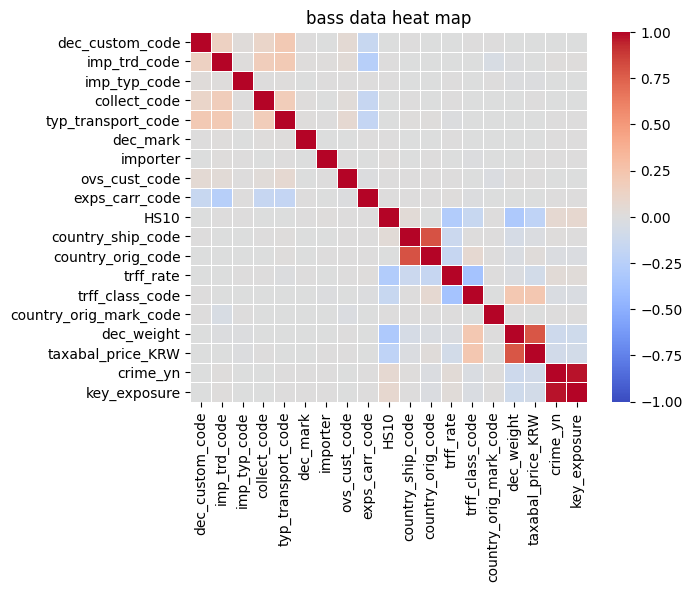

In [21]:
sns.heatmap(corr, cmap='coolwarm', linewidths =0.5, annot_kws={'size':10, 'fontproperties':fontprop}, vmin=-1.0)
plt.title('original data heat map')

- Let’s now plot a heatmap for the copy of the synthetic dataset.

Text(0.5, 1.0, 'syn data heat map')

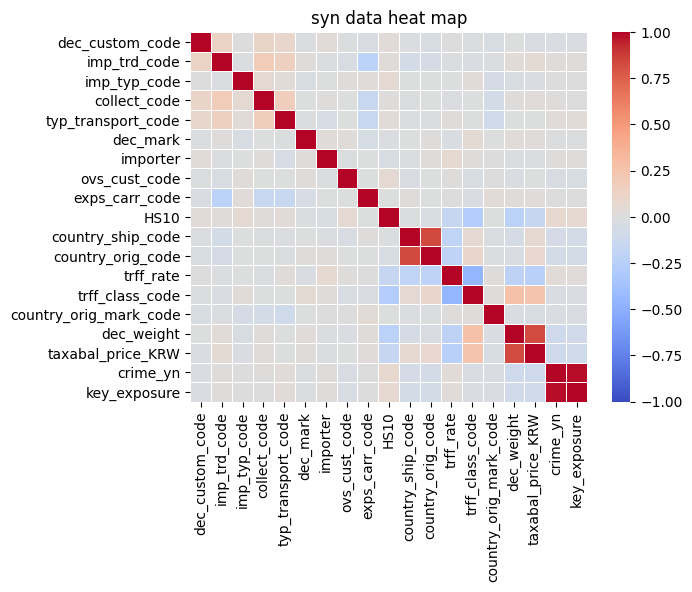

In [22]:
sns.heatmap(corr2, cmap='coolwarm', linewidths =0.5, annot_kws={'size':10, 'fontproperties':fontprop},vmin=-1.0)
plt.title('syn data heatmap’')

- We can see that the dark-colored squares are located in the same positions as in the heatmap of the original dataset. 
- This allows us to visually verify the similarity between the original and synthetic datasets.


